In [1]:
import pandas as pd
import numpy as np

In [4]:
# Create a dictionary

my_map = {"name":"name","from":"from","sex":"sex","age":"age"}

In [5]:
dict = [{'name': 'Ernesto', 'from': 'Hampton', 'sex':'male', 'age': 49},
         {'name': 'Kim', 'from': 'Atlanta', 'sex':'female', 'age': 43},
         {'name': 'Mike', 'from': 'Philly', 'sex':'male', 'age':48},
         {'name': 'Jordan', 'from':'Fredericksburg', 'sex':'male', 'age': 22},
         {'name': 'Chandra', 'from': 'Memphis', 'sex':'female', 'age': 43},
         {'name': 'Doug', 'from': 'Aberdeen', 'sex':'male', 'age': 55},
         {'name': 'Jeff', 'from': 'Cardiff', 'sex':'male', 'age': 57},
         {'name': 'Cindy', 'from':'Little Rock', 'sex': 'female', 'age':60},
         {'name': 'Keith', 'from': 'Reading', 'sex': 'male', 'age':57},
         {'name': 'Adrian', 'from': 'Tercera', 'sex': 'male', 'age': 38},
         {'name': 'Katherine', 'from': 'Fayeteville', 'sex': 'female', 'age': 38}]

In [6]:
dict

[{'name': 'Ernesto', 'from': 'Hampton', 'sex': 'male', 'age': 49},
 {'name': 'Kim', 'from': 'Atlanta', 'sex': 'female', 'age': 43},
 {'name': 'Mike', 'from': 'Philly', 'sex': 'male', 'age': 48},
 {'name': 'Jordan', 'from': 'Fredericksburg', 'sex': 'male', 'age': 22},
 {'name': 'Chandra', 'from': 'Memphis', 'sex': 'female', 'age': 43},
 {'name': 'Doug', 'from': 'Aberdeen', 'sex': 'male', 'age': 55},
 {'name': 'Jeff', 'from': 'Cardiff', 'sex': 'male', 'age': 57},
 {'name': 'Cindy', 'from': 'Little Rock', 'sex': 'female', 'age': 60},
 {'name': 'Keith', 'from': 'Reading', 'sex': 'male', 'age': 57},
 {'name': 'Adrian', 'from': 'Tercera', 'sex': 'male', 'age': 38},
 {'name': 'Katherine', 'from': 'Fayeteville', 'sex': 'female', 'age': 38}]

In [7]:
from sklearn.feature_extraction import DictVectorizer
vectors = DictVectorizer(sparse=False,sort=True).fit_transform(dict)
vectors

array([[49.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [43.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [48.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.],
       [22.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [43.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [55.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [57.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
      

In [9]:
X,y = vectors[:,1:],vectors[:,0]

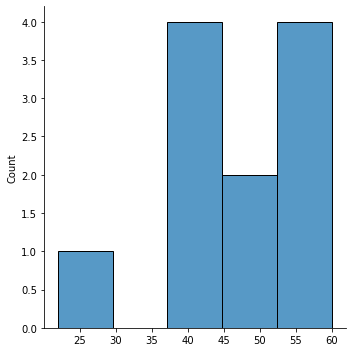

In [10]:
import seaborn as sns
sns.displot(y)

In [11]:
vectors.shape

(11, 25)

In [12]:
X.shape

(11, 24)

In [13]:
y.shape

(11,)

In [14]:
df = pd.DataFrame(dict).rename(columns=my_map)
print(df)

         name            from     sex  age
0     Ernesto         Hampton    male   49
1         Kim         Atlanta  female   43
2        Mike          Philly    male   48
3      Jordan  Fredericksburg    male   22
4     Chandra         Memphis  female   43
5        Doug        Aberdeen    male   55
6        Jeff         Cardiff    male   57
7       Cindy     Little Rock  female   60
8       Keith         Reading    male   57
9      Adrian         Tercera    male   38
10  Katherine     Fayeteville  female   38


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.33, shuffle=True, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((7, 24), (7,), (4, 24), (4,))

In [16]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=500, solver='lbfgs', ).fit(X_train, y_train)
print(model.score(X_train,y_train))

0.9999999992041277


In [17]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

-0.7041414647143382


In [18]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 8.710244089243737
Mean Squared Error: 162.21296567249607
Root Mean Squared Error: 12.736285395377102


In [19]:
df1 = pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df1

,Actual,Predicted
0,48.0,47.609104
1,22.0,45.945321
2,43.0,40.921394
3,38.0,46.426154
